# Study Overview

In this study, we are trying to analyze the psychophysiological data i.e. EDA and Temperature in 2 scenarios: 

* How EDA varies when the person is showering on his own and when the person is showering when the other is present.


      -whether the perceived pain and stress is less when the partner is present
* How EDA is changing over time while showering 
* How EDA and HR differ over the test periods (on day basis)

# Import Library

In [1]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl

sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the data

## EDA

### Day 0

In [2]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_0 = pd.read_csv('data/exp_1/EDA.csv' , header= None)
fl_eda_0.columns  = ['eda']
fl_eda_freq_0 = fl_eda_0.iloc[1].values
print(len(fl_eda_0))
print('freq: ', fl_eda_freq_0)
fl_eda_0.head(10)

1232
freq:  [4.]


,eda
0,1.526949e+09
1,4.000000e+00
2,0.000000e+00
3,3.446160e-01
4,4.150760e-01
5,4.278870e-01
6,4.330120e-01
7,4.227630e-01
8,3.804870e-01
9,3.881730e-01


In [4]:
fl_init_time_0 = datetime.datetime.utcfromtimestamp(fl_eda_0.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_0

'2018-05-22 00:29:47'

In [12]:
fl_eda_0 = fl_eda_0.iloc[3:]
fl_eda_0.head(5)

,eda
2018-05-22 00:29:47.750,0.427887
2018-05-22 00:29:48.000,0.433012
2018-05-22 00:29:48.250,0.422763
2018-05-22 00:29:48.500,0.380487
2018-05-22 00:29:48.750,0.388173


In [13]:
#create index 
fl_time_eda_0 = pd.date_range(start=fl_init_time_0, periods=len(fl_eda_0), freq=str(1/int(fl_eda_freq_0))+'S')
fl_time_eda_0

DatetimeIndex([       '2018-05-22 00:29:47', '2018-05-22 00:29:47.250000',
               '2018-05-22 00:29:47.500000', '2018-05-22 00:29:47.750000',
                      '2018-05-22 00:29:48', '2018-05-22 00:29:48.250000',
               '2018-05-22 00:29:48.500000', '2018-05-22 00:29:48.750000',
                      '2018-05-22 00:29:49', '2018-05-22 00:29:49.250000',
               ...
               '2018-05-22 00:34:48.750000',        '2018-05-22 00:34:49',
               '2018-05-22 00:34:49.250000', '2018-05-22 00:34:49.500000',
               '2018-05-22 00:34:49.750000',        '2018-05-22 00:34:50',
               '2018-05-22 00:34:50.250000', '2018-05-22 00:34:50.500000',
               '2018-05-22 00:34:50.750000',        '2018-05-22 00:34:51'],
              dtype='datetime64[ns]', length=1217, freq='250L')

In [14]:
fl_eda_0 = fl_eda_0.set_index(fl_time_eda_0, drop =True)
fl_eda_0.head()

,eda
2018-05-22 00:29:47.000,0.427887
2018-05-22 00:29:47.250,0.433012
2018-05-22 00:29:47.500,0.422763
2018-05-22 00:29:47.750,0.380487
2018-05-22 00:29:48.000,0.388173


In [15]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_0 = fl_eda_0[:-10]
fl_eda_0 = fl_eda_0.dropna()
print(len(fl_eda_0))
fl_eda_0.head()

1207


,eda
2018-05-22 00:29:47.000,0.427887
2018-05-22 00:29:47.250,0.433012
2018-05-22 00:29:47.500,0.422763
2018-05-22 00:29:47.750,0.380487
2018-05-22 00:29:48.000,0.388173


### Day 1

In [16]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_1 = pd.read_csv('data/exp_2/EDA.csv' , header= None)
fl_eda_1.columns  = ['eda']
fl_eda_freq_1 = fl_eda_1.iloc[1].values
print(len(fl_eda_1))
print('freq: ', fl_eda_freq_1)
fl_eda_1.head(10)

2120
freq:  [4.]


,eda
0,1.527038e+09
1,4.000000e+00
2,0.000000e+00
3,2.062570e-01
4,3.523020e-01
5,3.561460e-01
6,3.548650e-01
7,3.574270e-01
8,3.574270e-01
9,3.369290e-01


In [17]:
fl_init_time_1 = datetime.datetime.utcfromtimestamp(fl_eda_1.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_1

'2018-05-23 01:09:12'

In [18]:
fl_eda_1 = fl_eda_1.iloc[3:]
fl_eda_1.head(5)

,eda
3,0.206257
4,0.352302
5,0.356146
6,0.354865
7,0.357427


In [19]:
#create index 
fl_time_eda_1 = pd.date_range(start=fl_init_time_1, periods=len(fl_eda_1), freq=str(1/int(fl_eda_freq_1))+'S')
fl_time_eda_1

DatetimeIndex([       '2018-05-23 01:09:12', '2018-05-23 01:09:12.250000',
               '2018-05-23 01:09:12.500000', '2018-05-23 01:09:12.750000',
                      '2018-05-23 01:09:13', '2018-05-23 01:09:13.250000',
               '2018-05-23 01:09:13.500000', '2018-05-23 01:09:13.750000',
                      '2018-05-23 01:09:14', '2018-05-23 01:09:14.250000',
               ...
               '2018-05-23 01:17:58.750000',        '2018-05-23 01:17:59',
               '2018-05-23 01:17:59.250000', '2018-05-23 01:17:59.500000',
               '2018-05-23 01:17:59.750000',        '2018-05-23 01:18:00',
               '2018-05-23 01:18:00.250000', '2018-05-23 01:18:00.500000',
               '2018-05-23 01:18:00.750000',        '2018-05-23 01:18:01'],
              dtype='datetime64[ns]', length=2117, freq='250L')

In [20]:
fl_eda_1 = fl_eda_1.set_index(fl_time_eda_1, drop =True)
fl_eda_1.head()

,eda
2018-05-23 01:09:12.000,0.206257
2018-05-23 01:09:12.250,0.352302
2018-05-23 01:09:12.500,0.356146
2018-05-23 01:09:12.750,0.354865
2018-05-23 01:09:13.000,0.357427


In [21]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_1 = fl_eda_1[:-10]
fl_eda_1 = fl_eda_1.dropna()
print(len(fl_eda_1))
fl_eda_1.head()

2107


,eda
2018-05-23 01:09:12.000,0.206257
2018-05-23 01:09:12.250,0.352302
2018-05-23 01:09:12.500,0.356146
2018-05-23 01:09:12.750,0.354865
2018-05-23 01:09:13.000,0.357427


### Visualization

#### Remove Outliers

In [22]:
fl_exp0 = fl_eda_0.copy()#example dataset of normally distributed data. 
fl_exp0= fl_exp0[np.abs(fl_exp0.eda-fl_exp0.eda.mean())<=(3*fl_exp0.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp0= fl_exp0[~(np.abs(fl_exp0.eda-fl_exp0.eda.mean())>(3*fl_exp0.eda.std()))] #or if you prefer the other way around

print(len(fl_exp0))
fl_exp0.eda[:10]


1194


2018-05-22 00:29:47.750    0.380487
2018-05-22 00:29:48.000    0.388173
2018-05-22 00:29:48.250    0.416357
2018-05-22 00:29:48.500    0.374081
2018-05-22 00:29:48.750    0.353584
2018-05-22 00:29:49.000    0.381768
2018-05-22 00:29:49.250    0.417639
2018-05-22 00:29:50.250    0.402265
2018-05-22 00:29:50.500    0.381768
2018-05-22 00:29:50.750    0.372800
Name: eda, dtype: float64

In [23]:
fl_exp1 = fl_eda_1.copy()#example dataset of normally distributed data. 
fl_exp1= fl_exp1[np.abs(fl_exp1.eda-fl_exp1.eda.mean())<=(3*fl_exp1.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp1= fl_exp1[~(np.abs(fl_exp1.eda-fl_exp1.eda.mean())>(3*fl_exp1.eda.std()))] #or if you prefer the other way around

print(len(fl_exp1))
fl_exp1.eda[:10]


2056


2018-05-23 01:09:12.250    0.352302
2018-05-23 01:09:12.500    0.356146
2018-05-23 01:09:12.750    0.354865
2018-05-23 01:09:13.000    0.357427
2018-05-23 01:09:13.250    0.357427
2018-05-23 01:09:13.500    0.336929
2018-05-23 01:09:13.750    0.356146
2018-05-23 01:09:14.000    0.354865
2018-05-23 01:09:14.250    0.356146
2018-05-23 01:09:14.500    0.354865
Name: eda, dtype: float64

### Histogram

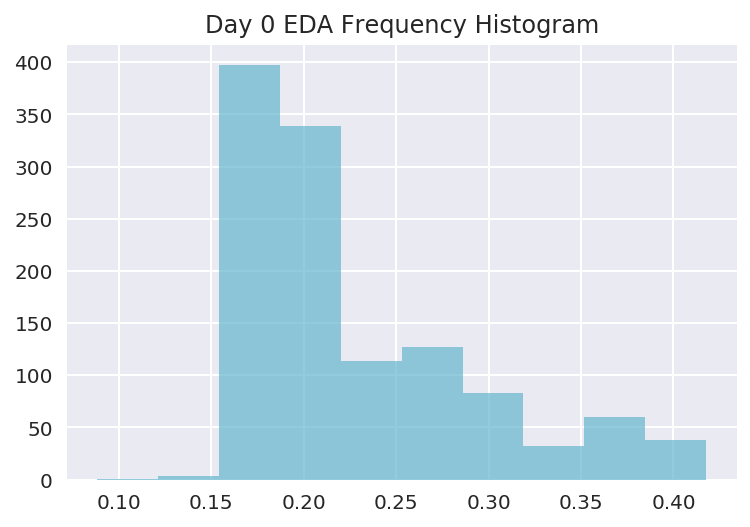

In [24]:
plt.hist(fl_exp0.eda, color = 'c', alpha = 0.7)
plt.title('Day 0 EDA Frequency Histogram')
plt.show()

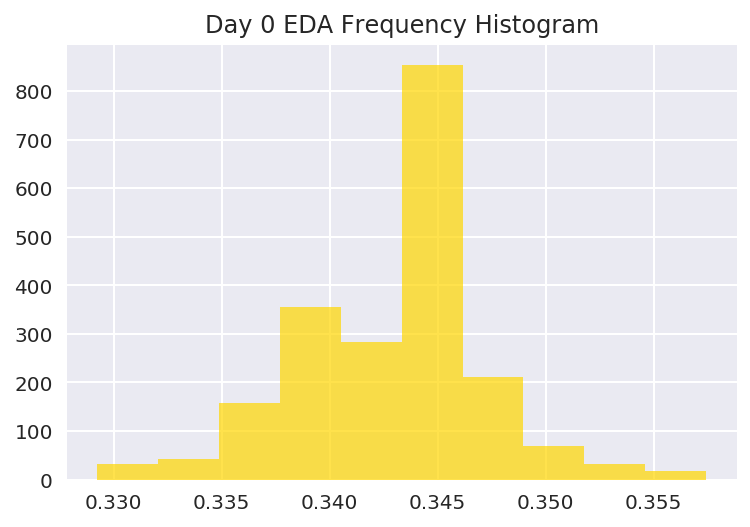

In [26]:
plt.hist(fl_exp1.eda, color = 'gold', alpha = 0.7)
plt.title('Day 0 EDA Frequency Histogram')
plt.show()

#### Time-series Plot

In [ ]:
y_mean = np.mean(fl_exp0.eda)
plt.figure(figsize=(25,15))
plt.plot(fl_exp0)
plt.legend(['Experiment Day 0 EDA'],loc=1,fontsize='medium')
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
plt.title('Cold Shower Experiment Day 0')
plt.show()

### Day 1


I consider the experiment is 3 minutes and the sampling frequencyf is 4Hz which is 0.25s per record. We can take 720 records based on this frequency. We then exclude the last 3 second which might be the dalay of the process of truning off the wristband. 

In turn we will first exclude the last 3 *4 = 12 records which include 720 + 12 = 732 records into our analysis as the experimental period every day .

In [ ]:
fl_day0 = 

## EDA Analysis

## CR 

 **r**: phasic component
     
 
 **p**: sparse SMNA driver of phasic component
     
     
 **t**: tonic component
     
     
 **l**: coefficients of tonic spline
     
     
 **d**: offset and slope of the linear drift term
 
 
 **e**: model residuals
 
 
 **obj**: value of objective function being minimized (eq 15 of paper)

In [ ]:
y = np.asarray(fl_exp0.eda)
y[:10]

In [ ]:
yn = (y - y.mean()) / y.std()
Fs = 4.
[r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm = pl.arange(1., len(y)+1.) / Fs


In [ ]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (25, 20),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pl.rcParams.update(params)

In [ ]:
print(obj)

In [ ]:
pl.hold(True)
pl.plot(tm, yn)
pl.plot(tm, r)
pl.plot(tm, p)
pl.plot(tm, t)
pl.title('Experiment Day 0 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

In [ ]:
pl.hold(True)
y_mean = np.mean(yn)
plt.axhline(y = y_mean,color = 'salmon',linestyle='--')
pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 Raw SC Z-score')
# pl.legend(['SC series','Phasic Component','SMNA sparse driver of phasic component',
#            'Tonic Component'])

pl.show()

In [ ]:
pl.hold(True)
# pl.plot(tm, yn)
pl.plot(tm, r)
# pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Phasic Component')
pl.show()

In [ ]:
pl.hold(True)
# pl.plot(tm, yn)
# pl.plot(tm, r)
pl.plot(tm, p)
# pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Sparse SMNA driver of Phasic Component')
pl.show()

In [ ]:
pl.hold(True)
# pl.plot(tm, yn)
# pl.plot(tm, r)
# pl.plot(tm, p)
pl.plot(tm, t)
pl.title('Experiment Day 0 EDA Tonic Component')
pl.show()